Run 1 (Seed 10): MSE = 21713548.64
Run 2 (Seed 20): MSE = 31885663.26
Run 3 (Seed 30): MSE = 26123894.61
Run 4 (Seed 40): MSE = 44024061.34
Run 5 (Seed 50): MSE = 38688016.07


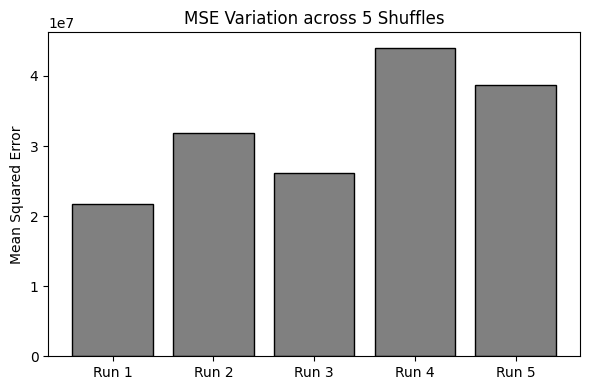

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load Data
df = pd.read_csv('Salary_dataset.csv')
X = df[['YearsExperience']]
y = df['Salary']

mse_scores = []
shuffle_seeds = [10, 20, 30, 40, 50]

for i, seed in enumerate(shuffle_seeds):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed, shuffle=True
    )
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"Run {i+1} (Seed {seed}): MSE = {mse:.2f}")

plt.figure(figsize=(6, 4))
plt.bar(['Run 1', 'Run 2', 'Run 3', 'Run 4', 'Run 5'], mse_scores, color='gray', edgecolor='black')
plt.ylabel('Mean Squared Error')
plt.title('MSE Variation across 5 Shuffles')
plt.tight_layout()

MSE (None):     49830096.86
MSE (MinMax):   49830096.86
MSE (Standard): 49830096.86


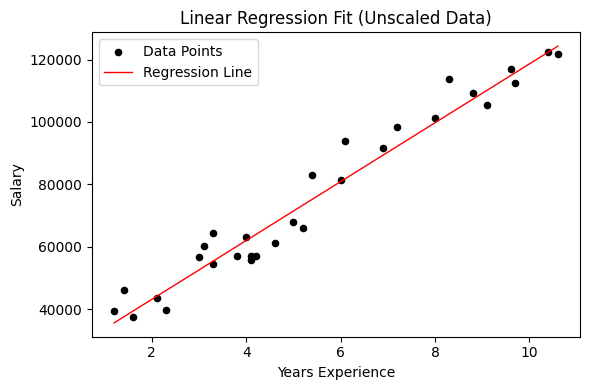

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load Data - Ensure Salary_dataset.csv is in the same folder
df = pd.read_csv('Salary_dataset.csv')
X = df[['YearsExperience']]
y = df['Salary']

# Fixed 80:20 Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1. No Normalization (Raw Data)
model = LinearRegression()
model.fit(X_train, y_train)
mse_none = mean_squared_error(y_test, model.predict(X_test))
print(f"MSE (None):     {mse_none:.2f}")

# 2. Min-Max Scaling (0 to 1 range)
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(X_train)
X_test_mm = scaler_mm.transform(X_test)

model_mm = LinearRegression()
model_mm.fit(X_train_mm, y_train)
mse_mm = mean_squared_error(y_test, model_mm.predict(X_test_mm))
print(f"MSE (MinMax):   {mse_mm:.2f}")

# 3. Standard Scaling (Mean=0, Std=1)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)

model_std = LinearRegression()
model_std.fit(X_train_std, y_train)
mse_std = mean_squared_error(y_test, model_std.predict(X_test_std))
print(f"MSE (Standard): {mse_std:.2f}")

# Create Visual Comparison
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='black', marker='o', s=20, label='Data Points')
# Use the unscaled model for the plot to match raw X/y scale
plt.plot(X, model.predict(X), color='red', linewidth=1, label='Regression Line')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Fit (Unscaled Data)')
plt.legend()
plt.tight_layout()